# Bangalore Price Prediction

###### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option("display.max_column",None)

In [2]:
df=pd.read_csv("Train.csv")

In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df["society"].nunique()

2688

In [6]:
df.drop(columns=["society"],inplace=True)

In [7]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [8]:
df = df.dropna(axis=0, subset=['location'])

In [9]:
for i in df.columns:
    print(" {} has {} unique values".format(i,df[i].nunique()))

 area_type has 4 unique values
 availability has 81 unique values
 location has 1305 unique values
 size has 31 unique values
 total_sqft has 2117 unique values
 bath has 19 unique values
 balcony has 4 unique values
 price has 1994 unique values


###### Since total_sqft feature has values which are present in other units so converted those into square ft

In [10]:
def clean_sqft(num):
    if "-" in num:
        num1=num.split("-")[0].strip()
        num1=float(num1)
        num2=num.split("-")[1].strip()
        num2=float(num2)
        sqft = ((num1+num2)/2)
        return sqft
    elif "Sq. Meter" in num:
        num = re.sub(r"Sq. Meter","",num).strip()
        num=float(num)
        num = num*10.764
        return num
    elif "Perch" in num:
        num = re.sub(r"Perch","",num).strip()
        num=float(num)
        num = num*272
        return num
    elif "Acres" in num:
        num = re.sub(r"Acres","",num).strip()
        num=float(num)
        num = num*43560
        return num
    elif "Cents" in num:
        num = re.sub(r"Cents","",num).strip()
        num=float(num)
        num = num*435.6
        return num
    elif "Sq. Yards" in num:
        num = re.sub(r"Sq. Yards","",num).strip()
        num=float(num)
        num = num*9
        return num
    elif "Guntha" in num:
        num = re.sub(r"Guntha","",num).strip()
        num=float(num)
        num = num*1088.98
        return num
    elif "Grounds" in num:
        num = re.sub(r"Grounds","",num).strip()
        num=float(num)
        num = num*2400
        return num
    else:
        return num
    
df["total_sqft"]=df["total_sqft"].apply(clean_sqft).astype('float')

In [11]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# Bedroom should be converted into BHK

df["size"]=df["size"].str.replace("Bedroom","BHK")

In [13]:
# 2 BHK was used most in the size feature so used that value in general

df["size"].fillna("2 BHK",inplace = True)

<AxesSubplot:>

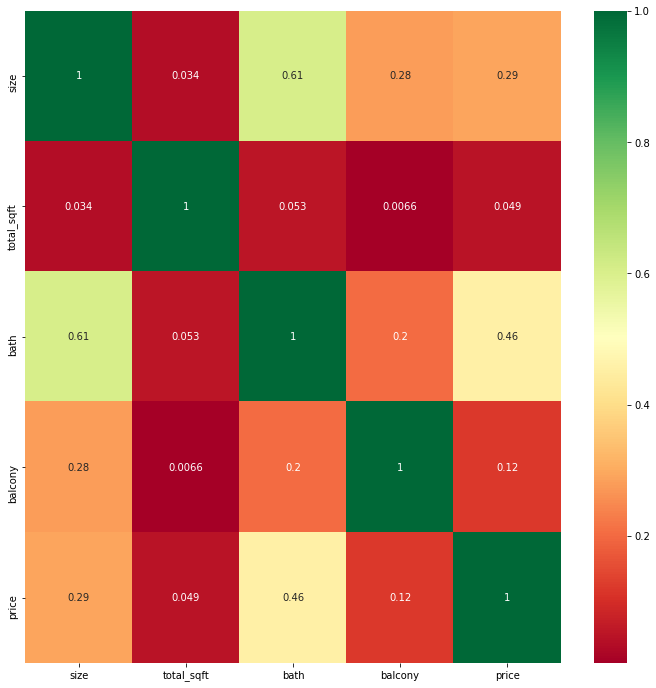

In [14]:
df_copy=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy["size"]=le.fit_transform(df_copy["size"])
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(),annot = True , cmap="RdYlGn")

###### Since from the above correlation matrix , bath and balcony is more correlated with size with comparison to total_sqft so bath and balcony should we groupby with respect to size 

In [15]:
df['bath'] = df.groupby(['size']).transform(lambda x: x.fillna(x.median()))['bath']
df['balcony'] = df.groupby(['size']).transform(lambda x: x.fillna(x.median()))['balcony']

/home/anshul/anaconda3/envs/bangalorehouseprediction/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [16]:
df[df["balcony"].isnull()].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,2000.0,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0
11559,Plot Area,18-Apr,1Kasavanhalli,18 BHK,1200.0,18.0,NaN,200.0


In [17]:
df["balcony"].fillna(0,inplace = True)

In [18]:
df.drop(columns=["area_type","availability"],inplace=True)

In [19]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [20]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

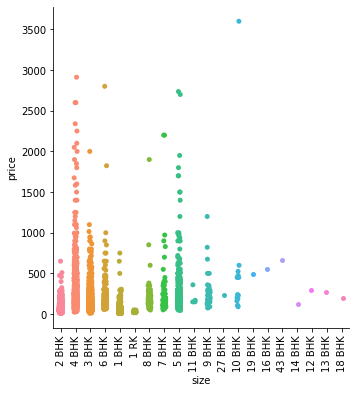

In [21]:
g=sns.catplot(data=df,x="size",y="price")
g.set_xticklabels(rotation=90)

In [22]:
df["BHK"]=df["size"].str.split(" ").str[0]

In [23]:
df["BHK"]=df["BHK"].astype(int)

In [24]:
# BHK more then 11 is a bit odd as large value BHK houses are not often present and in data also it act as very minority data

df=df[df["BHK"]<11]

In [25]:
df.shape

(13307, 7)

In [26]:
df["location"].value_counts().sort_values(ascending=False).head(60)

Whitefield                  540
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
Yelahanka                   213
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     82
Kasavanhalli                 80
Harlur                       79
Banashankari                 75
Hormavu                      74
Kengeri                      73
Ramamurthy Nagar             73
Koramangala                  72
JP Nagar

In [27]:
location_idex=df["location"].value_counts().sort_values(ascending=False).head(80).index

In [28]:
location_idex

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Bannerghatta Road', 'Hennur Road',
       '7th Phase JP Nagar', 'Haralur Road', 'Electronic City Phase II',
       'Rajaji Nagar', 'Chandapura', 'Bellandur', 'KR Puram',
       'Electronics City Phase 1', 'Hoodi', 'Yeshwanthpur', 'Begur Road',
       'Sarjapur', 'Kasavanhalli', 'Harlur', 'Banashankari', 'Hormavu',
       'Kengeri', 'Ramamurthy Nagar', 'Koramangala', 'JP Nagar', 'Hosa Road',
       'Old Madras Road', 'Jakkur', 'Varthur', 'Kothanur', 'Kaggadasapura',
       'Nagarbhavi', 'Thigalarapalya', 'Akshaya Nagar', 'TC Palaya',
       'Malleshwaram', '8th Phase JP Nagar', 'Rachenahalli', 'Hennur',
       'Budigere', 'Jigani', 'HSR Layout', 'Jalahalli', 'Hulimavu', 'Panathur',
       'Bisuvanahalli', 'Ramagondanahalli', 'Hegde Nagar', 'Bhoganhalli',
       'Mysore Road', 'Gottigere', 'Brookefield', '

In [29]:
location_idex=['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli',
       'Raja Rajeshwari Nagar','Bannerghatta Road',
       '7th Phase JP Nagar', 'Electronic City Phase II',
       'Rajaji Nagar', 'Bellandur', 'KR Puram',
       'Electronics City Phase 1', 'Yeshwanthpur', 'Sarjapur',
       'Banashankari','Kengeri', 'Koramangala', 'JP Nagar','Malleshwaram',
       '8th Phase JP Nagar','HSR Layout','Mysore Road','Hosur Road', 'Brookefield',
       'Indira Nagar', 'CV Raman Nagar',]

In [30]:
len(location_idex)

30

In [31]:
df=df[df["location"].isin(location_idex)]

In [32]:
df.shape

(4108, 7)

In [33]:
for area in location_idex:
    df[area]=np.where(df["location"]==area,1,0)

In [34]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Uttarahalli,Hebbal,Marathahalli,Raja Rajeshwari Nagar,Bannerghatta Road,7th Phase JP Nagar,Electronic City Phase II,Rajaji Nagar,Bellandur,KR Puram,Electronics City Phase 1,Yeshwanthpur,Sarjapur,Banashankari,Kengeri,Koramangala,JP Nagar,Malleshwaram,8th Phase JP Nagar,HSR Layout,Mysore Road,Hosur Road,Brookefield,Indira Nagar,CV Raman Nagar
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df.drop(columns=["location","size"],inplace=True)

In [36]:
df.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'BHK', 'Whitefield',
       'Sarjapur  Road', 'Electronic City', 'Kanakpura Road', 'Yelahanka',
       'Uttarahalli', 'Hebbal', 'Marathahalli', 'Raja Rajeshwari Nagar',
       'Bannerghatta Road', '7th Phase JP Nagar', 'Electronic City Phase II',
       'Rajaji Nagar', 'Bellandur', 'KR Puram', 'Electronics City Phase 1',
       'Yeshwanthpur', 'Sarjapur', 'Banashankari', 'Kengeri', 'Koramangala',
       'JP Nagar', 'Malleshwaram', '8th Phase JP Nagar', 'HSR Layout',
       'Mysore Road', 'Hosur Road', 'Brookefield', 'Indira Nagar',
       'CV Raman Nagar'],
      dtype='object')

In [37]:
df=df[['Whitefield',
       'Sarjapur  Road', 'Electronic City', 'Kanakpura Road', 'Yelahanka',
       'Uttarahalli', 'Hebbal', 'Marathahalli', 'Raja Rajeshwari Nagar',
       'Bannerghatta Road', '7th Phase JP Nagar', 'Electronic City Phase II',
       'Rajaji Nagar', 'Bellandur', 'KR Puram', 'Electronics City Phase 1',
       'Yeshwanthpur', 'Sarjapur', 'Banashankari', 'Kengeri', 'Koramangala',
       'JP Nagar', 'Malleshwaram', '8th Phase JP Nagar', 'HSR Layout',
       'Mysore Road', 'Hosur Road', 'Brookefield', 'Indira Nagar',
       'CV Raman Nagar','BHK','total_sqft', 'bath', 'balcony', 'price']]

In [38]:
df.head()

,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Uttarahalli,Hebbal,Marathahalli,Raja Rajeshwari Nagar,Bannerghatta Road,7th Phase JP Nagar,Electronic City Phase II,Rajaji Nagar,Bellandur,KR Puram,Electronics City Phase 1,Yeshwanthpur,Sarjapur,Banashankari,Kengeri,Koramangala,JP Nagar,Malleshwaram,8th Phase JP Nagar,HSR Layout,Mysore Road,Hosur Road,Brookefield,Indira Nagar,CV Raman Nagar,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1056.0,2.0,1.0,39.07
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1440.0,2.0,3.0,62.00
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1170.0,2.0,1.0,38.00
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3300.0,4.0,2.0,600.00
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1310.0,3.0,1.0,63.25


In [39]:
X=df.drop(labels=["price"],axis=1)
y=df["price"].values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,8,10,12,14]
min_samples_leaf=[2,5,8,10]

In [43]:
param_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

In [44]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()

In [45]:
model=RandomizedSearchCV(estimator=model_rf,param_distributions=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=1,n_iter = 10)

In [46]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=900, min_samples_split=14, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=14, min_samples_leaf=10, max_features=auto, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=14, min

[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=8, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=300, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
model.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [48]:
model.best_score_

-5744.356166097823

In [49]:
predictions=model.predict(X_test)

/home/anshul/anaconda3/envs/bangalorehouseprediction/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

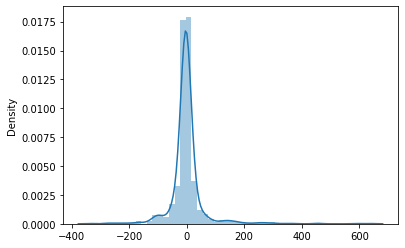

In [50]:
sns.distplot(y_test-predictions)

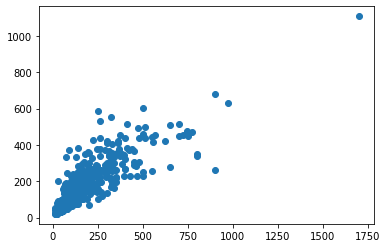

In [51]:
plt.scatter(y_test,predictions)

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 27.996519614581057
MSE: 3679.0997350399034
RMSE: 60.65558288434712


In [54]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)